# 曲线介绍

## 幂基曲线

一条$n$次曲线的幂基表达式为
$$
\mathbf{c}(u) = \sum_{i=0}^{n} \mathbf{p}_i u^i,\qquad u\in[0,1]
$$
其中
- $\mathbf{p}_i$是控制曲线形状的系数，称为控制点
- $n$是曲线的次数

这个表达式用 $u^i$ 作为基函数，并且每个基函数都有一个对应的系数 $\mathbf{p}_i$，这些系数决定了每个幂函数在曲线上的影响程度。通过调整这些系数，可以实现对曲线形状的精确控制。

将上式写成矩阵形式
$$
\mathbf{c}(u) = \begin{bmatrix} \mathbf{p}_0 & \mathbf{p}_1 & \cdots & \mathbf{p}_n \end{bmatrix} \begin{bmatrix} 1 \\ u \\ \vdots \\ u^n \end{bmatrix}
$$

接下来我们以三次曲线为例，讨论如何通过控制点来调整曲线的形状。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

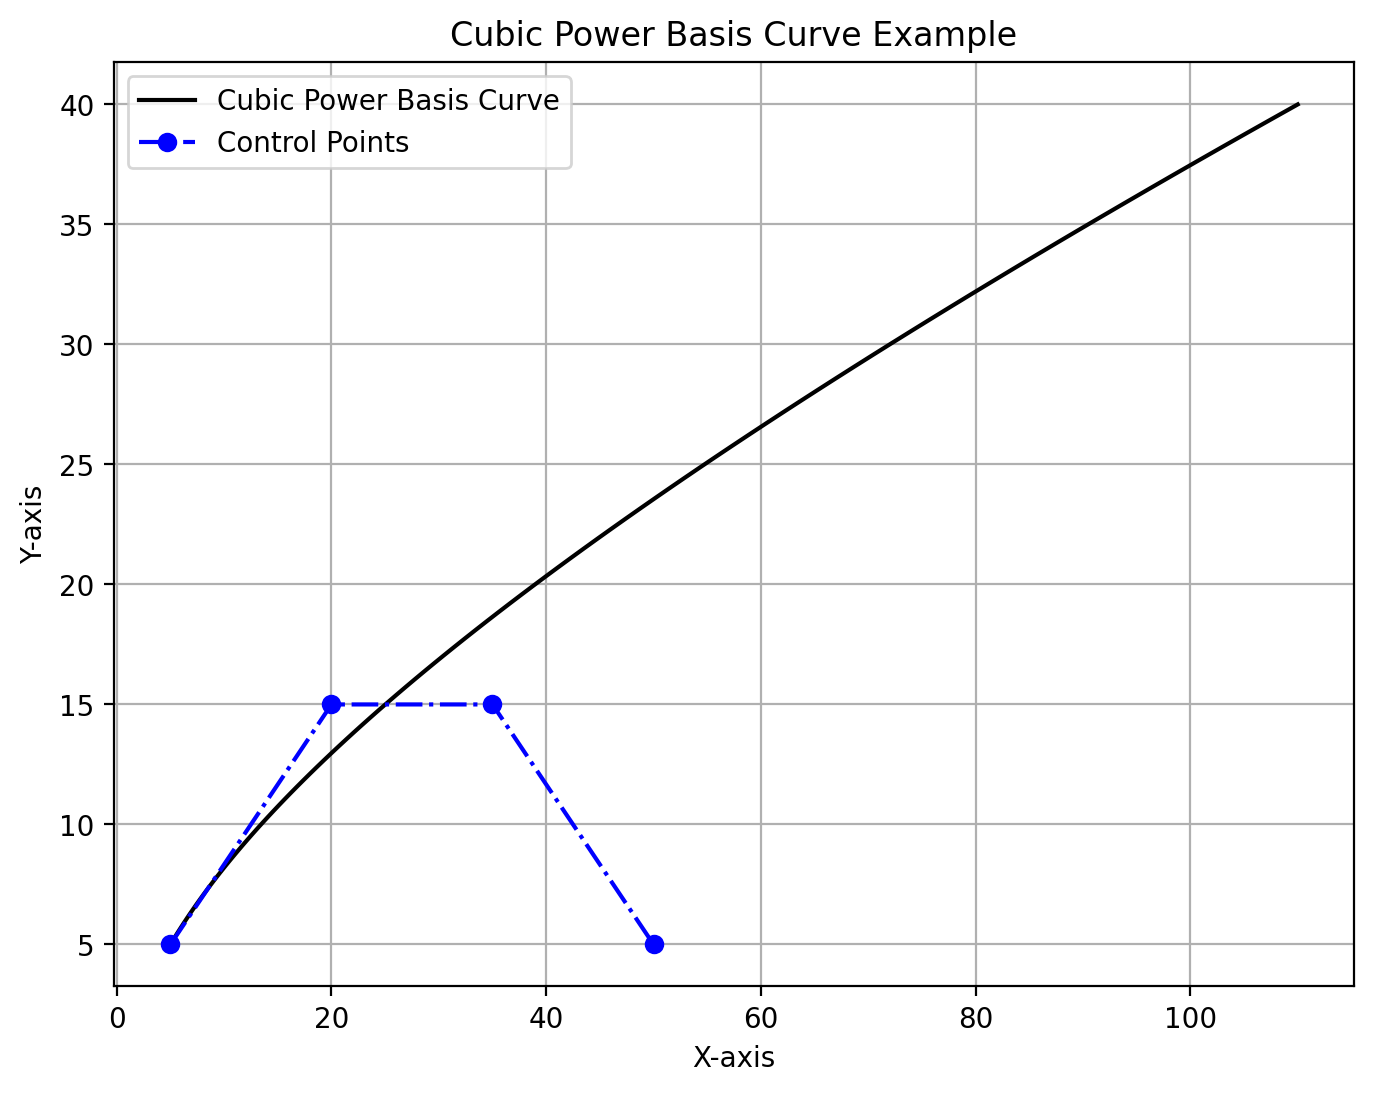

In [2]:
def power_curve(control_points, u_values, n):
    U = np.array([[u**i for i in range(n + 1)] for u in u_values]).T
    P = np.array(control_points)
    # print(P.shape,U.shape)
    return (P.T @ U).T


# Example control points
control_points = np.array([[5.0, 5.0], [20.0, 15.0], [35.0, 15.0], [50.0, 5.0]])

n = control_points.shape[0] - 1
u_values = np.linspace(0, 1, 100)
curve_points = power_curve(control_points, u_values, n)

# Plotting the curve
plt.figure(figsize=(8, 6))
plt.plot(curve_points[:, 0], curve_points[:, 1], "k-", label="Cubic Power Basis Curve")
plt.plot(control_points[:, 0], control_points[:, 1], "bo-.", label="Control Points")
plt.title("Cubic Power Basis Curve Example")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()

## Bézier 曲线

可以看到，直接使用幂基曲线来控制曲线的形状是不太方便的，因为控制点的位置和曲线的形状之间并没有直接的关系。为了更方便地控制曲线的形状，我们引入了 Bézier 曲线。

一条 $n$ 次 Bézier 曲线的表达式为
$$
\mathbf{c}(u) = \sum_{i=0}^{n} \mathbf{p}_i B_{i,n}(u),\qquad u\in[0,1]
$$
其中$B_{i,n}(u)$是 $n$ 次 Bernstain 多项式，定义为
$$
B_{i,n}(u) = \binom{n}{i} u^i (1-u)^{n-i}
$$
于是，我们可以算出
$$
c'(0)=n(\mathbf{p}_1-\mathbf{p}_0),\qquad c'(1)=n(\mathbf{p}_n-\mathbf{p}_{n-1})
$$
也就是说，$\overrightarrow{\mathbf{p}_0\mathbf{p}_1}$就是曲线起点处的切线方向，$\overrightarrow{\mathbf{p}_{n-1}\mathbf{p}_n}$就是曲线终点处的切线方向。


对于三次 Bézier 曲线，我们有
$$
\mathbf{c}(u) = (1-u)^3 \mathbf{p}_0 + 3u(1-u)^2 \mathbf{p}_1 + 3u^2(1-u) \mathbf{p}_2 + u^3 \mathbf{p}_3
$$
将其写成矩阵形式
$$
\mathbf{c}(u) = \begin{bmatrix} \mathbf{p}_0 & \mathbf{p}_1 & \mathbf{p}_2 & \mathbf{p}_3 \end{bmatrix} \begin{bmatrix} (1-u)^3 \\ 3u(1-u)^2 \\ 3u^2(1-u) \\ u^3 \end{bmatrix}
$$


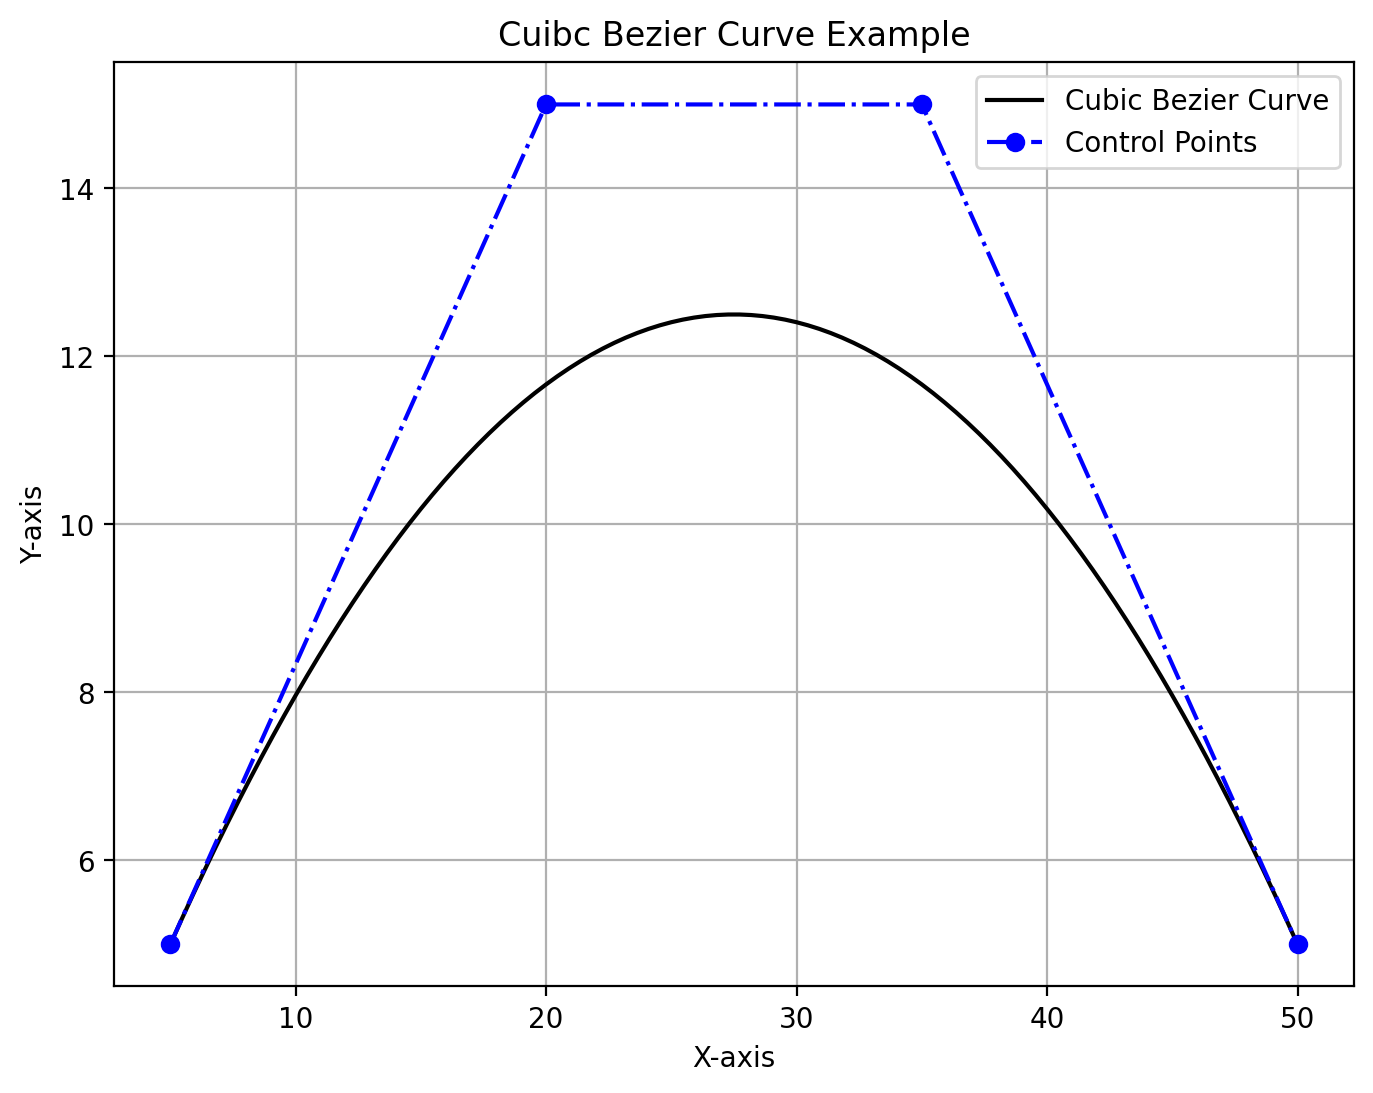

In [3]:
def cubic_bezier_curve(control_points, u):
    P = np.array(control_points)
    U = np.array([(1 - u) ** 3, 3 * u * (1 - u) ** 2, 3 * u**2 * (1 - u), u**3])
    return (P.T @ U).T


# Example control points
control_points = np.array([[5.0, 5.0], [20.0, 15.0], [35.0, 15.0], [50.0, 5.0]])
n = control_points.shape[0] - 1
u_values = np.linspace(0, 1, 100)
curve_points = cubic_bezier_curve(control_points, u_values)

# Plotting the curve
plt.figure(figsize=(8, 6))
plt.plot(curve_points[:, 0], curve_points[:, 1], "k-", label="Cubic Bezier Curve")
plt.plot(control_points[:, 0], control_points[:, 1], "bo-.", label="Control Points")
plt.title("Cuibc Bezier Curve Example")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()

## B样条曲线

Bézier 曲线提供了一种直观的控制曲线形状的方式，但是它也有一些缺点。例如，对于高次 Bézier 曲线，控制点的数量会变得很多，这使得曲线的控制变得困难。此外，Bézier 曲线是全局的，这意味着移动一个控制点会影响整条曲线的形状。为了克服这些缺点，我们引入了 B 样条曲线。

B 样条曲线是分段的多项式曲线，它使用一组称为节点的控制点来定义。与 Bézier 曲线不同，B 样条曲线的控制点只影响曲线的一部分，这使得 B 样条曲线比 Bézier 曲线更灵活。此外，B 样条曲线可以是局部的，这意味着移动一个控制点只会影响曲线的一部分。


一条 **p 次 B 样条曲线** 的定义为：

$$
\mathbf{c}(u) = \sum_{i=0}^{n} \mathbf{p}_i N_{i,p}(u), \quad u \in [u_0, u_{m}]
$$

其中：
- $\mathbf{p}_i$ 是控制点，用来控制曲线的形状。
- $u_0, u_1, \ldots, u_m$ 是节点向量，它是一个非递减的实数序列。
- $N_{i,p}(u)$ 是 **p 次 B 样条基函数**。

B 样条基函数 $N_{i,p}(u)$ 可以通过 Cox-de Boor 递推公式来定义：


$$
N_{i,0}(u) = \begin{cases}
1 & \text{if } u_i \leq u < u_{i+1} \\
0 & \text{otherwise}
\end{cases}
$$

$$
N_{i,p}(u) = \frac{u - u_i}{u_{i+p} - u_i} N_{i,p-1}(u) + \frac{u_{i+p+1} - u}{u_{i+p+1} - u_{i+1}} N_{i+1,p-1}(u)
$$



B 样条基函数具有以下性质：
- **局部支撑性:** 每个基函数 $N_{i,p}(u)$ 只在区间 $[u_i, u_{i+p+1}]$ 内非零。
- **权性:** 对于任何 $u$ 值，所有非零基函数的和为 1。
- **连续性:** $p$ 次 B 样条基函数在每个节点处都是 $C^{p-1}$ 连续的。

由于 B 样条基函数的这些性质，B 样条曲线具有以下优点：
- **局部控制:** 移动一个控制点只会影响曲线的一部分。
- **灵活性:** B 样条曲线可以表示各种形状，包括 Bézier 曲线无法表示的形状。
- **数值稳定性:** B 样条曲线对控制点位置的变化不太敏感。

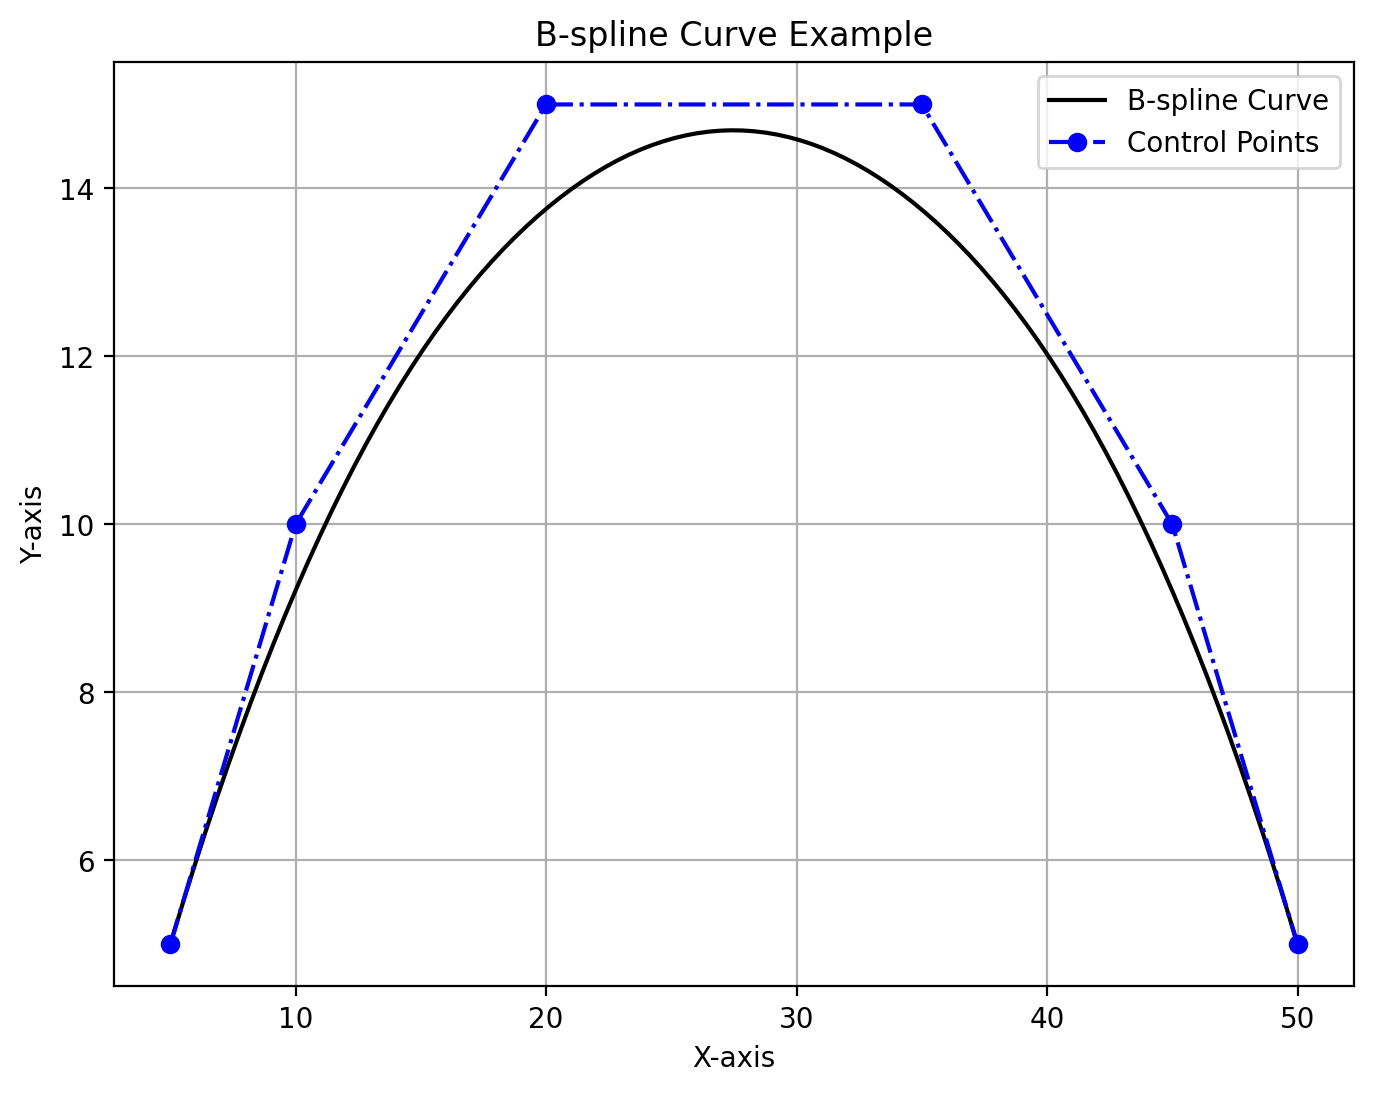

In [4]:
def bspline_basis_function(i, p, u, knots):
    """
    Calculates the value of the B-spline basis function N_{i,p}(u).

    Args:
        i: Index of the basis function.
        p: Degree of the B-spline curve.
        u: Parameter value.
        knots: Knot vector.

    Returns:
        Value of the basis function N_{i,p}(u).
    """
    if p == 0:
        if knots[i] <= u < knots[i + 1]:
            return 1
        else:
            return 0
    else:
        term1 = 0
        if knots[i + p] != knots[i]:
            term1 = ((u - knots[i]) / (knots[i + p] - knots[i])) * bspline_basis_function(i, p - 1, u, knots)
        term2 = 0
        if knots[i + p + 1] != knots[i + 1]:
            term2 = ((knots[i + p + 1] - u) / (knots[i + p + 1] - knots[i + 1])) * bspline_basis_function(
                i + 1, p - 1, u, knots
            )
        return term1 + term2


def bspline_curve(control_points, p, knots, u_values):
    """
    Calculates the points on a B-spline curve.

    Args:
        control_points: Control points of the curve.
        p: Degree of the B-spline curve.
        knots: Knot vector.
        u_values: Parameter values for evaluating the curve.

    Returns:
        Points on the B-spline curve.
    """
    n = len(control_points) - 1
    curve_points = []
    for u in u_values:
        point = np.zeros_like(control_points[0])  # Initialize point with the same shape as control points
        for i in range(n + 1):
            point += control_points[i] * bspline_basis_function(i, p, u, knots)
        curve_points.append(point)
    return np.array(curve_points)


# Example usage:
control_points = np.array([[5.0, 5.0], [10.0, 10.0], [20.0, 15.0], [35.0, 15.0], [45.0, 10.0], [50.0, 5.0]])
p = 3  # Degree of the B-spline curve
knots = np.array([0.0, 0.0, 0.0, 0.0, 0.33, 0.66, 1.0, 1.0, 1.0, 1.0])  # Knot vector
u_values = np.linspace(0, 0.999, 100)  # Parameter values for evaluation

curve_points = bspline_curve(control_points, p, knots, u_values)

# Plotting the curve
plt.figure(figsize=(8, 6))
plt.plot(curve_points[:, 0], curve_points[:, 1], "k-", label="B-spline Curve")
plt.plot(control_points[:, 0], control_points[:, 1], "bo-.", label="Control Points")
plt.title("B-spline Curve Example")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()

当节点向量形如 $\{0, \ldots , 0, 1, \ldots ,1\}$ 时，B 样条曲线就是 Bézier 曲线。因此，Bézier 曲线是 B 样条曲线的一种特殊情况。

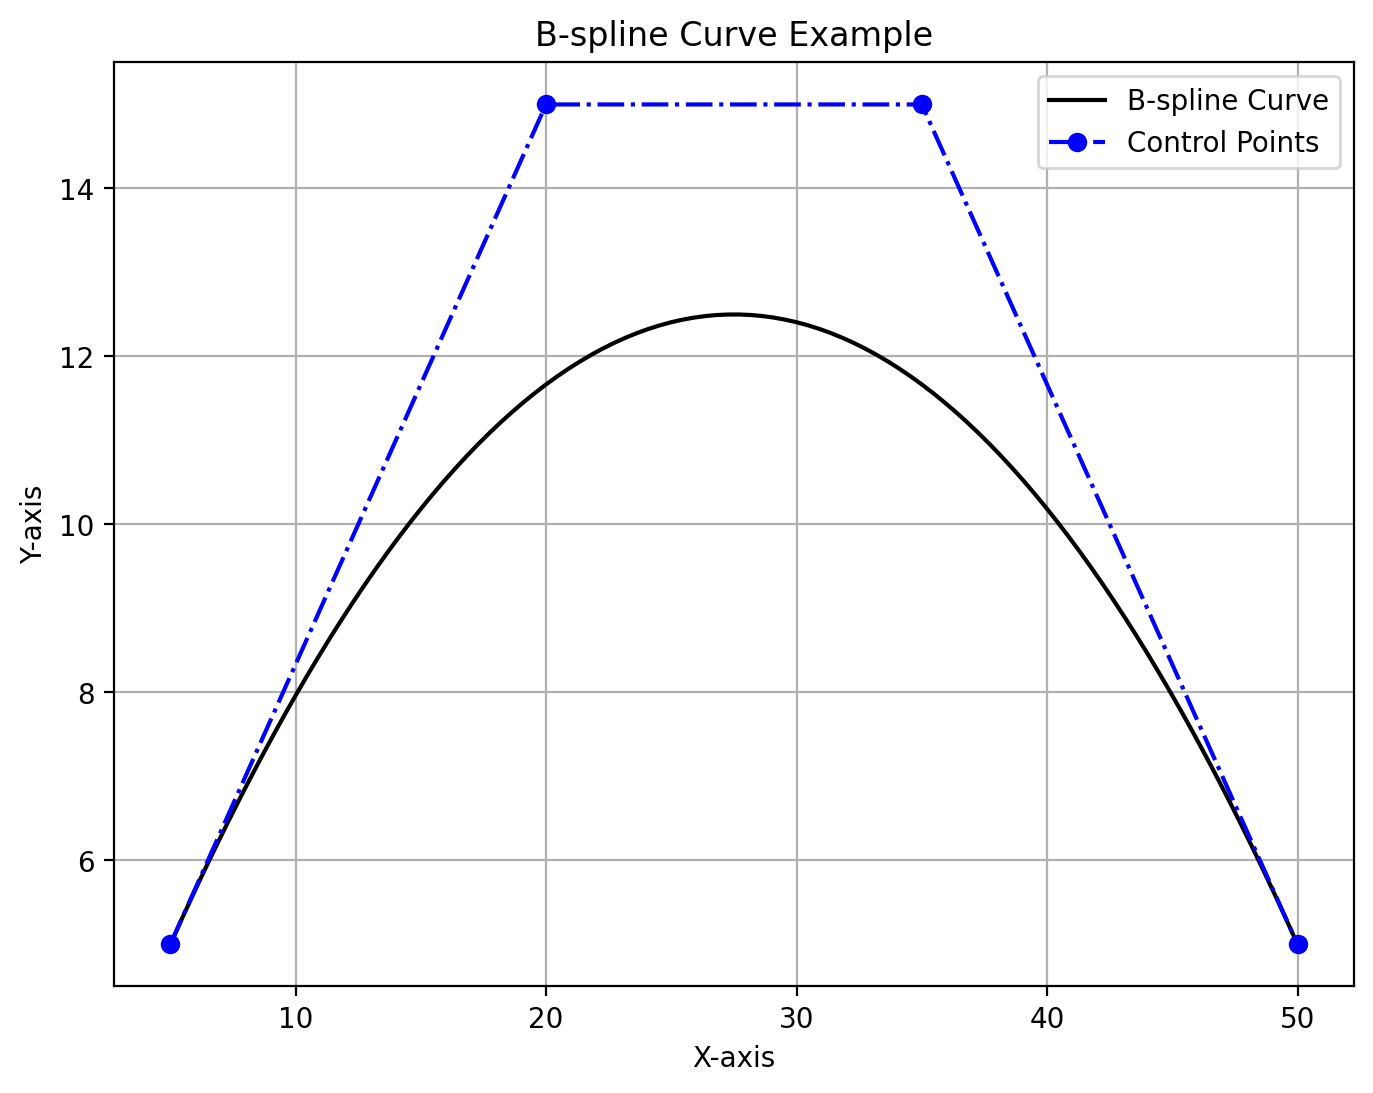

In [5]:
control_points = np.array([[5.0, 5.0], [20.0, 15.0], [35.0, 15.0], [50.0, 5.0]])
p = 3
knots = np.array([0, 0, 0, 0, 1, 1, 1, 1])  # Knot vector
u_values = np.linspace(0, 0.999, 100)  # Parameter values for evaluation

curve_points = bspline_curve(control_points, p, knots, u_values)

# Plotting the curve
plt.figure(figsize=(8, 6))
plt.plot(curve_points[:, 0], curve_points[:, 1], "k-", label="B-spline Curve")
plt.plot(control_points[:, 0], control_points[:, 1], "bo-.", label="Control Points")
plt.title("B-spline Curve Example")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.grid(True)
plt.show()

## NURBS 曲线

B 样条曲线在很多领域都很有用，但它不能精确地表示一些重要的曲线，例如圆锥曲线。为了解决这个问题，我们引入了 NURBS 曲线。

NURBS 是非均匀有理 B 样条（Non-Uniform Rational B-spline）的缩写。NURBS 曲线是 B 样条曲线的一种推广，它增加了权重，可以精确地表示圆锥曲线和其他有理曲线。

一条 **p 次 NURBS 曲线** 的定义为：

$$
\mathbf{c}(u) = \frac{\sum_{i=0}^{n} N_{i,p}(u) w_i \mathbf{p}_i}{\sum_{i=0}^{n} N_{i,p}(u) w_i}, \quad u \in [u_0, u_{m}]
$$

其中：
- $\mathbf{p}_i$ 是控制点，用来控制曲线的形状。
- $w_i$ 是控制点 $\mathbf{p}_i$ 的权重。
- $u_0, u_1, \ldots, u_m$ 是节点向量，它是一个非递减的实数序列。
- $N_{i,p}(u)$ 是 **p 次 B 样条基函数**。

可以看到，当所有权重都相等时，NURBS 曲线就退化为 B 样条曲线。

NURBS 曲线具有以下优点：
- **可以精确地表示圆锥曲线和其他有理曲线。**
- **继承了 B 样条曲线的所有优点，例如局部控制、灵活性和数值稳定性。**
- **可以通过调整权重来改变曲线的形状。**

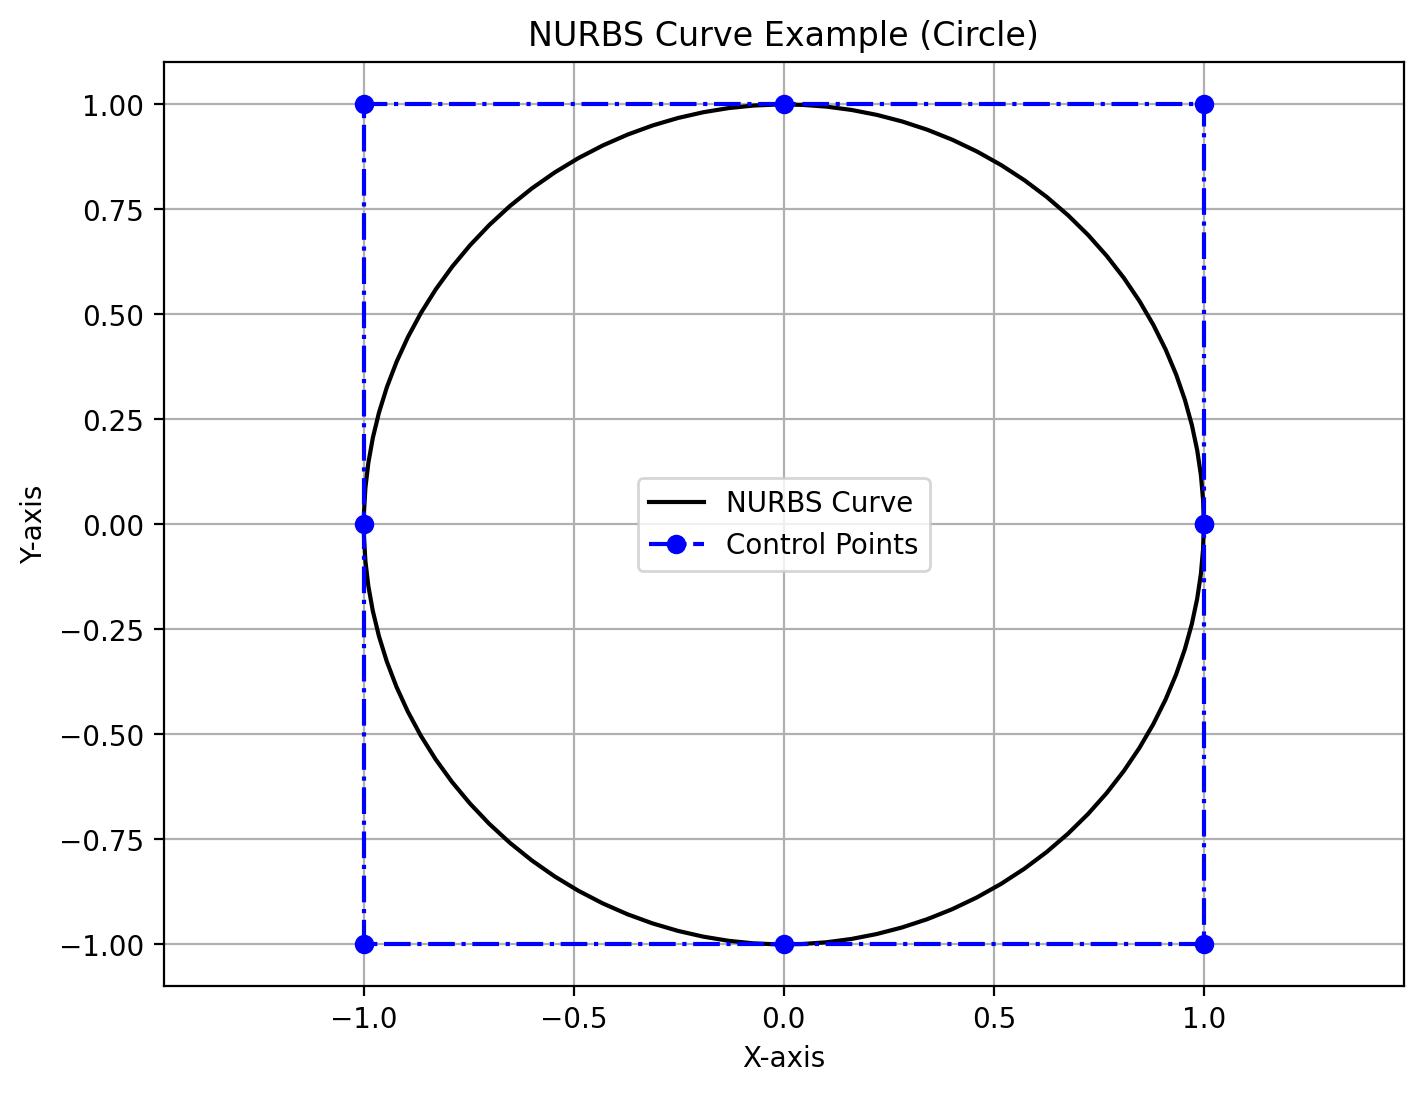

In [15]:
def nurbs_curve(control_points, weights, p, knots, u_values):
    """
    Calculates the points on a NURBS curve.

    Args:
        control_points: Control points of the curve.
        weights: Weights of the control points.
        p: Degree of the NURBS curve.
        knots: Knot vector.
        u_values: Parameter values for evaluating the curve.

    Returns:
        Points on the NURBS curve.
    """
    n = len(control_points) - 1
    curve_points = []
    for u in u_values:
        numerator = np.zeros_like(control_points[0])
        denominator = 0.0
        for i in range(n + 1):
            basis_function_value = bspline_basis_function(i, p, u, knots)
            numerator += basis_function_value * weights[i] * control_points[i]
            denominator += basis_function_value * weights[i]
        curve_points.append(numerator / denominator)
    return np.array(curve_points)


# Example usage:
control_points = np.array([[1, 0], [1, 1], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1], [1, 0]], dtype=float)
weights = np.array([1, 0.707, 1, 0.707, 1, 0.707, 1, 0.707, 1])
p = 2  # Degree of the NURBS curve
knots = np.array([0, 0, 0, 0.25, 0.25, 0.5, 0.5, 0.75, 0.75, 1, 1, 1])  # Knot vector
u_values = np.linspace(0, 0.9999, 100)  # Parameter values for evaluation

curve_points = nurbs_curve(control_points, weights, p, knots, u_values)

# Plotting the curve
plt.figure(figsize=(8, 6))
plt.plot(curve_points[:, 0], curve_points[:, 1], "k-", label="NURBS Curve")
plt.plot(control_points[:, 0], control_points[:, 1], "bo-.", label="Control Points")
plt.title("NURBS Curve Example (Circle)")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()